# 探索葡萄酒数据集

对红葡萄酒质量数据进行探索性分析
本数据集包含1599种红酒，11个关于酒的化学成分的变量。至少3名葡萄酒专家对每种酒
进行了评分，分数在0（非常差）到10（非常好）之间

In [76]:
# 导入必要的包
library(ggplot2)
library(dplyr)
library(GGally)
library(scales)
library(memisc)
library(reshape)
library(gridExtra)

In [77]:
#读取数据
pf <- read.csv('wineQualityReds.csv')

In [78]:
#探索数据格式
dim(pf)

[1] 1599   13

In [79]:
#查看数据集各个变量
str(pf)

'data.frame':	1599 obs. of  13 variables:
 $ X                   : int  1 2 3 4 5 6 7 8 9 10 ...
 $ fixed.acidity       : num  7.4 7.8 7.8 11.2 7.4 7.4 7.9 7.3 7.8 7.5 ...
 $ volatile.acidity    : num  0.59 0.88 0.76 0.28 0.7 0.66 0.6 0.65 0.58 0.5 ...
 $ citric.acid         : num  0.08 0 0.04 0.56 0 0 0.06 0 0.02 0.36 ...
 $ residual.sugar      : num  4.4 2.6 2.3 1.9 1.9 1.8 1.6 1.2 2 6.1 ...
 $ chlorides           : num  0.086 0.098 0.092 0.075 0.076 0.075 0.069 0.065 0.073 0.071 ...
 $ free.sulfur.dioxide : num  6 25 15 17 11 13 15 15 9 17 ...
 $ total.sulfur.dioxide: num  29 67 54 60 34 40 59 21 18 102 ...
 $ density             : num  0.997 0.997 0.997 0.998 0.998 ...
 $ pH                  : num  3.38 3.2 3.26 3.16 3.51 3.51 3.3 3.39 3.36 3.35 ...
 $ sulphates           : num  0.5 0.68 0.65 0.58 0.56 0.56 0.46 0.47 0.57 0.8 ...
 $ alcohol             : num  9 9.8 9.8 9.8 9.4 9.4 9.4 10 9.5 10.5 ...
 $ quality             : int  4 5 5 6 5 5 5 7 7 5 ...


In [80]:
#查看统计量
summary(pf)

       X          fixed.acidity   volatile.acidity  citric.acid   
 Min.   :   1.0   Min.   : 4.60   Min.   :0.1200   Min.   :0.000  
 1st Qu.: 400.5   1st Qu.: 7.10   1st Qu.:0.3900   1st Qu.:0.090  
 Median : 800.0   Median : 7.90   Median :0.5200   Median :0.260  
 Mean   : 800.0   Mean   : 8.32   Mean   :0.5278   Mean   :0.271  
 3rd Qu.:1199.5   3rd Qu.: 9.20   3rd Qu.:0.6400   3rd Qu.:0.420  
 Max.   :1599.0   Max.   :15.90   Max.   :1.5800   Max.   :1.000  
 residual.sugar     chlorides       free.sulfur.dioxide total.sulfur.dioxide
 Min.   : 0.900   Min.   :0.01200   Min.   : 1.00       Min.   :  6.00      
 1st Qu.: 1.900   1st Qu.:0.07000   1st Qu.: 7.00       1st Qu.: 22.00      
 Median : 2.200   Median :0.07900   Median :14.00       Median : 38.00      
 Mean   : 2.539   Mean   :0.08747   Mean   :15.87       Mean   : 46.47      
 3rd Qu.: 2.600   3rd Qu.:0.09000   3rd Qu.:21.00       3rd Qu.: 62.00      
 Max.   :15.500   Max.   :0.61100   Max.   :72.00       Max.   :289.0

### 单变量部分

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


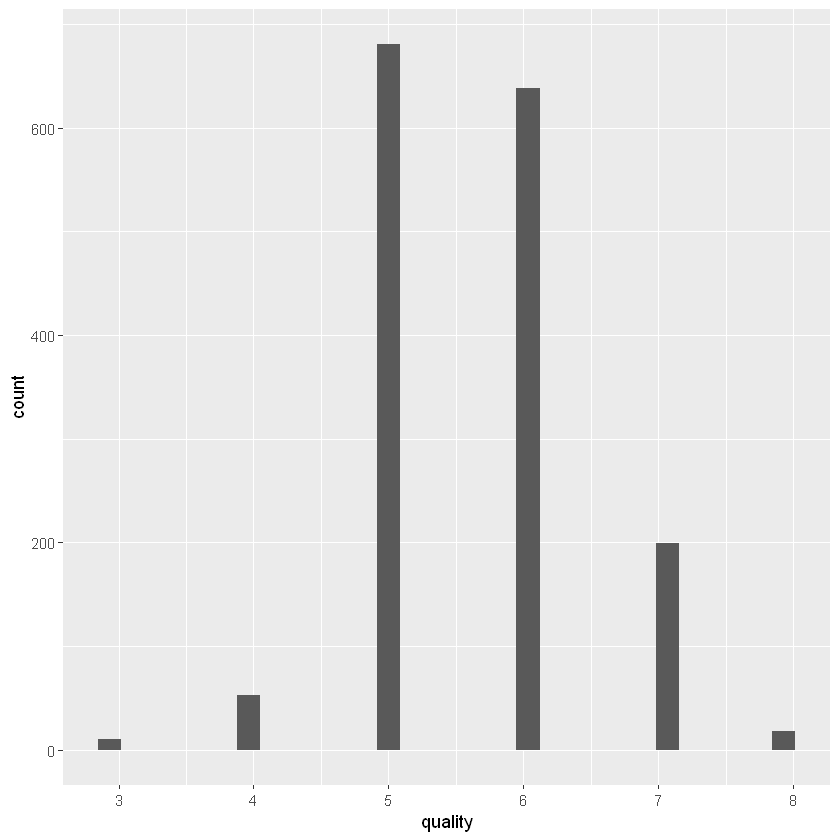

In [81]:
# 红酒质量直方图
ggplot(aes(x=quality),data=pf)+
      geom_histogram()

In [82]:
histogram <- function(feature){
    ggplot(data=wineQualityReds,aes_string(x = feature))
}

In [83]:
table(pf$quality)

# 质量分数的分布


  3   4   5   6   7   8 
 10  53 681 638 199  18 

红酒质量大多都是5或6，质量为5的数量最多为681种，其次是质量为6的红酒是638种，质量在3和8之间的红酒数量比较少，变量quality是数值型的，分布在0和10之间

In [88]:
#变量quality是数值型的，把它变为因子型的变量

pf$quality <- factor(pf$quality,order=T)

#创建新变量rating ，小于5的为bad，5到6的为average
pf$rating <- ifelse(pf$quality<5,'bad',ifelse(pf$quality<7,'average','good'))

table(pf$rating)


average     bad    good 
   1319      63     217 

In [112]:
pf$rating 

ERROR: Error in pf$rating$type: $ operator is invalid for atomic vectors


找出PH,density的分布

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


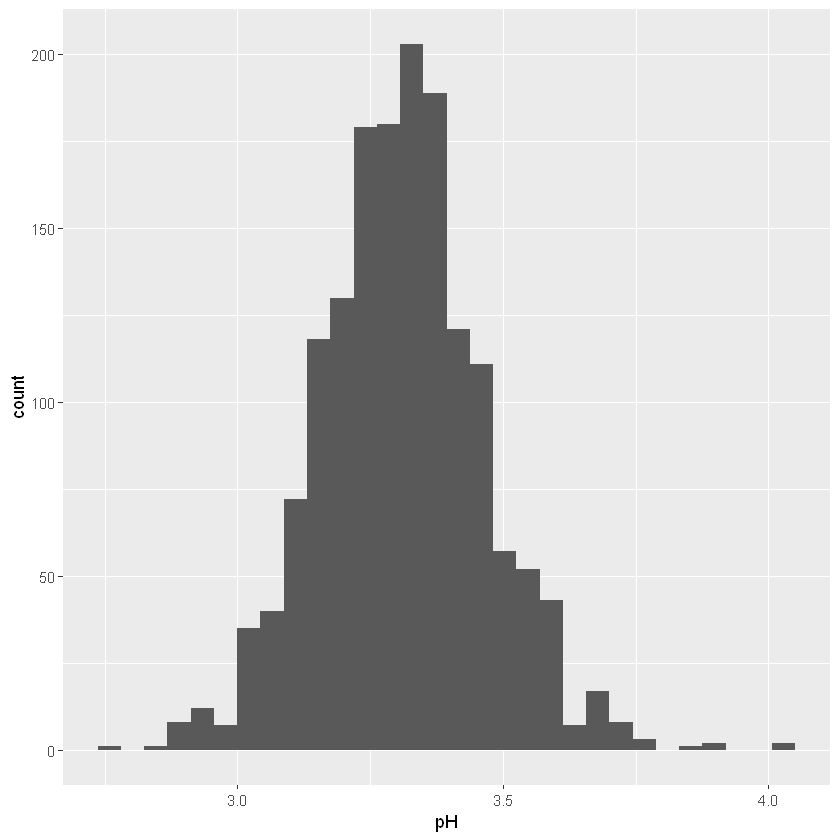

In [89]:
ggplot(aes(x=pH),data=pf) + geom_histogram()

pH大部分集中在3.0到3.5之间，偏正态分布

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


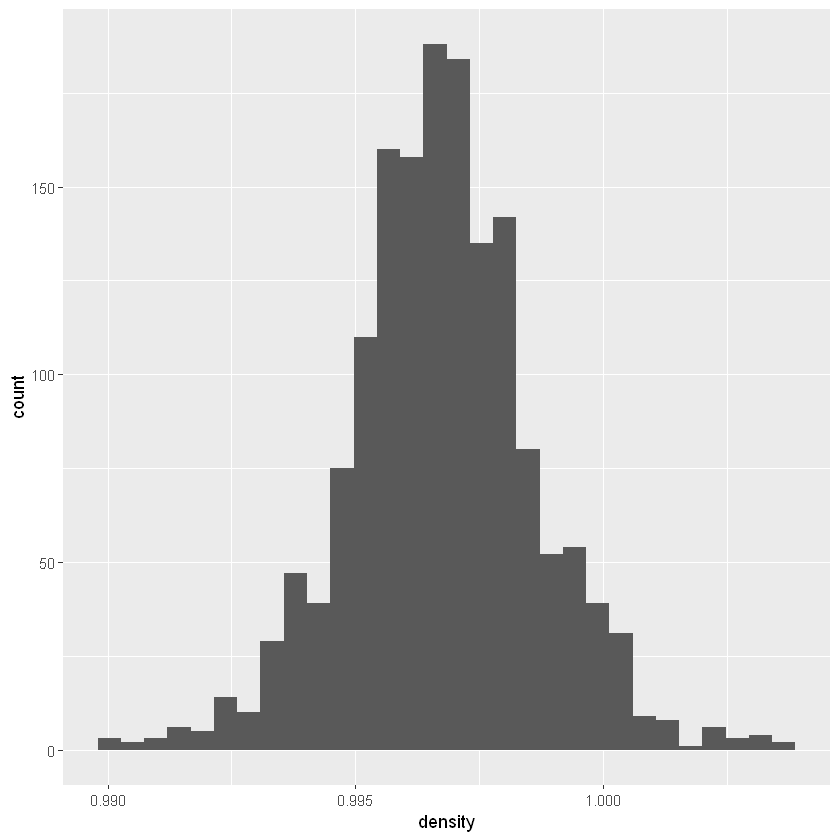

In [90]:
ggplot(aes(x=density),data=pf)+geom_histogram()

In [33]:
# 查看density统计量
summary(pf$density)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.9901  0.9956  0.9968  0.9967  0.9978  1.0037 

集中在0.9956和0.9978之间，偏正态分布。

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


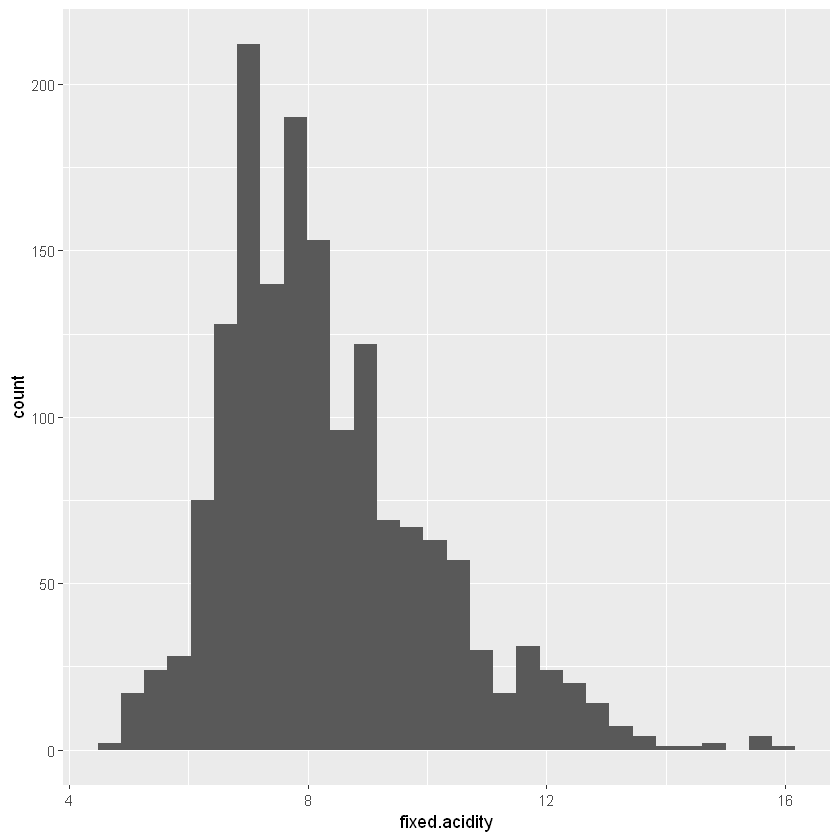

In [91]:
ggplot(aes(x=fixed.acidity),data=pf) + geom_histogram()

In [92]:
summary(pf$fixed.acidity)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   4.60    7.10    7.90    8.32    9.20   15.90 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


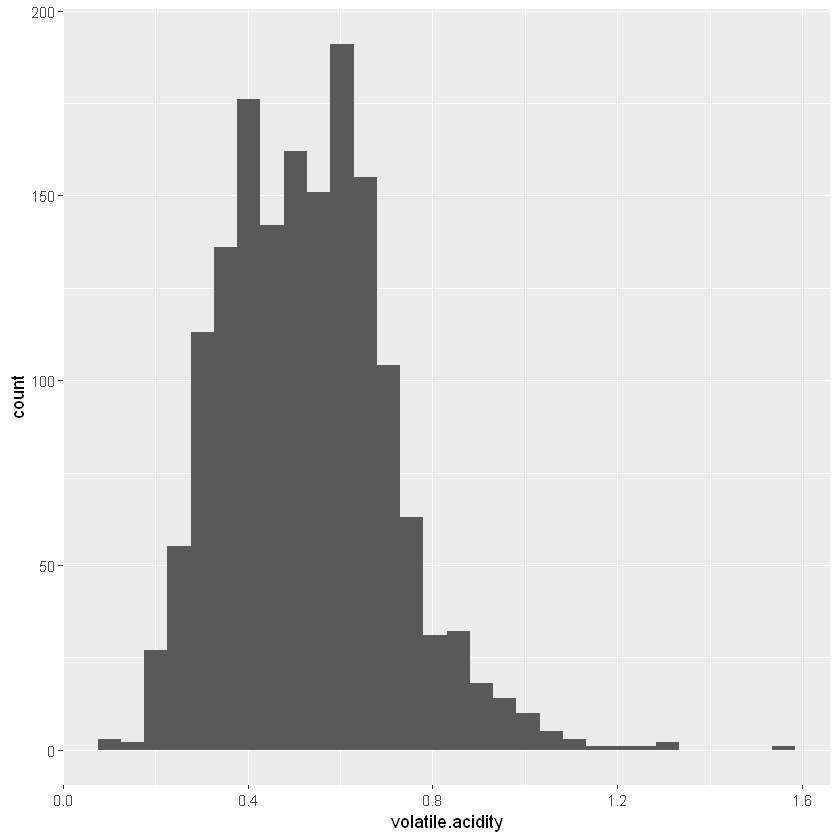

In [93]:
ggplot(aes(x=volatile.acidity),data=pf) + geom_histogram()

In [94]:
summary(pf$volatile.acidity)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.1200  0.3900  0.5200  0.5278  0.6400  1.5800 

volatile.acidity中位数在0.52，有些右偏

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


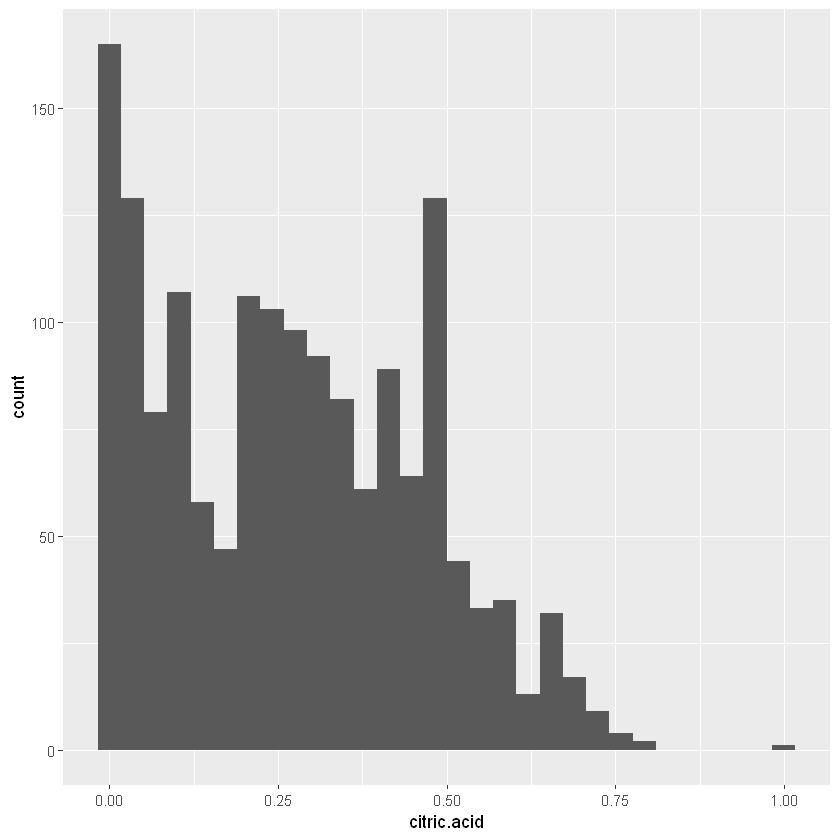

In [95]:
ggplot(aes(x=citric.acid),data=subset(pf)) + geom_histogram()

In [96]:
summary(pf$citric.acid)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   0.090   0.260   0.271   0.420   1.000 

citric最小值为0，不知道是否存在缺失值，右偏

In [39]:
table(pf$citric.acid == 0)


FALSE  TRUE 
 1467   132 

citric.acid中有132个值为0

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


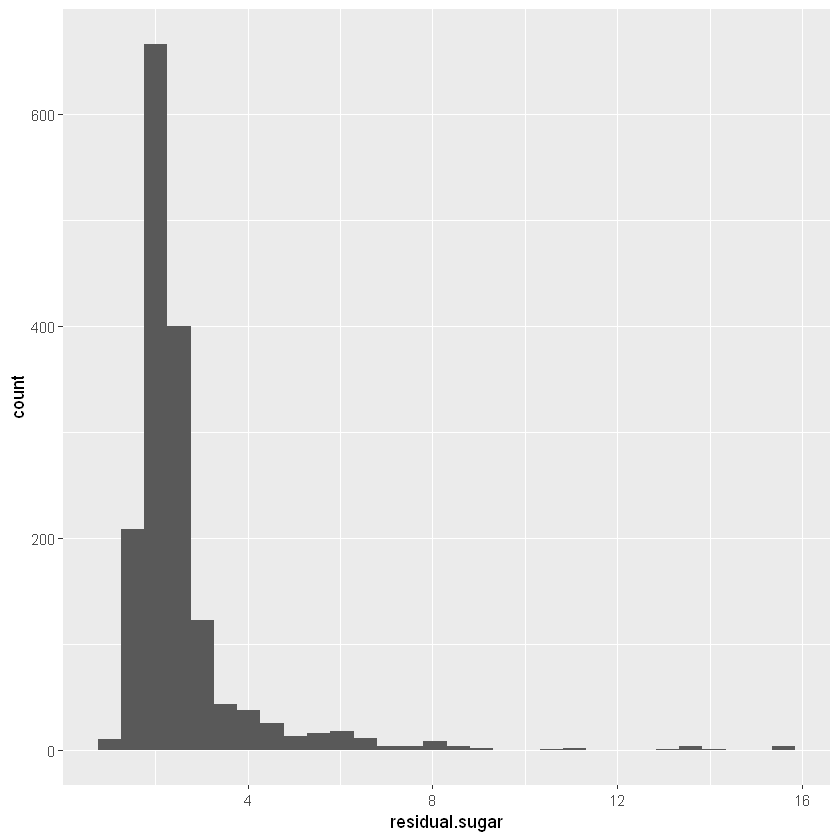

In [40]:
ggplot(aes(x=residual.sugar),data=pf) + geom_histogram()

In [41]:
summary(pf$residual.sugar)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.900   1.900   2.200   2.539   2.600  15.500 

residual.sugar右偏严重，最小值为0.900，最大值为15.500

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


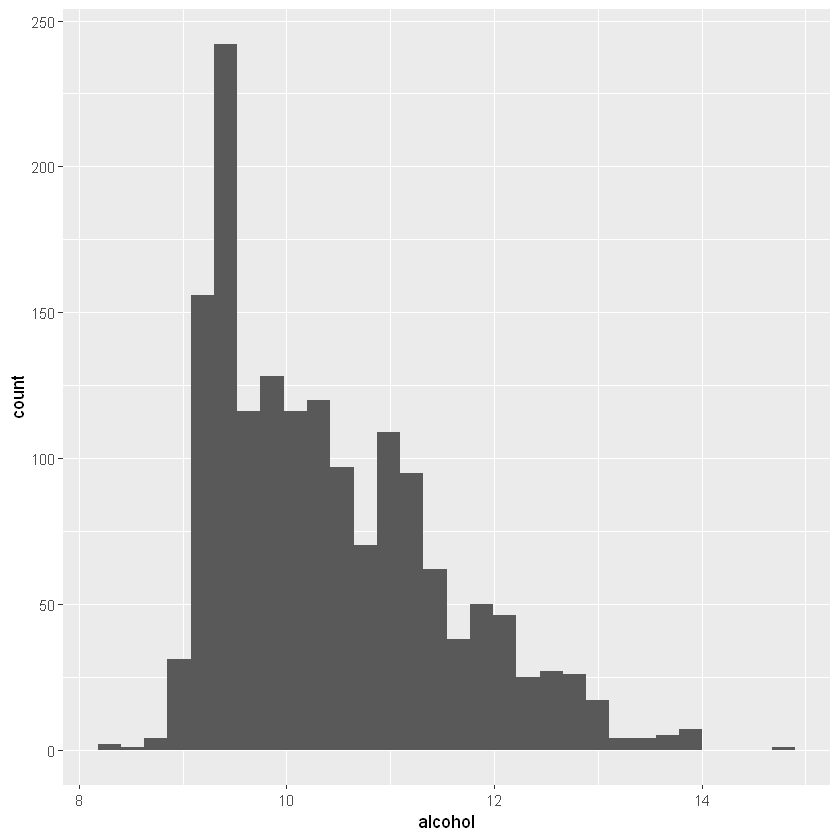

In [97]:
ggplot(aes(x=alcohol),data=pf)+geom_histogram()

In [98]:
summary(pf$alcohol)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   8.40    9.50   10.20   10.42   11.10   14.90 

alcohol中位数为10.20，右偏

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


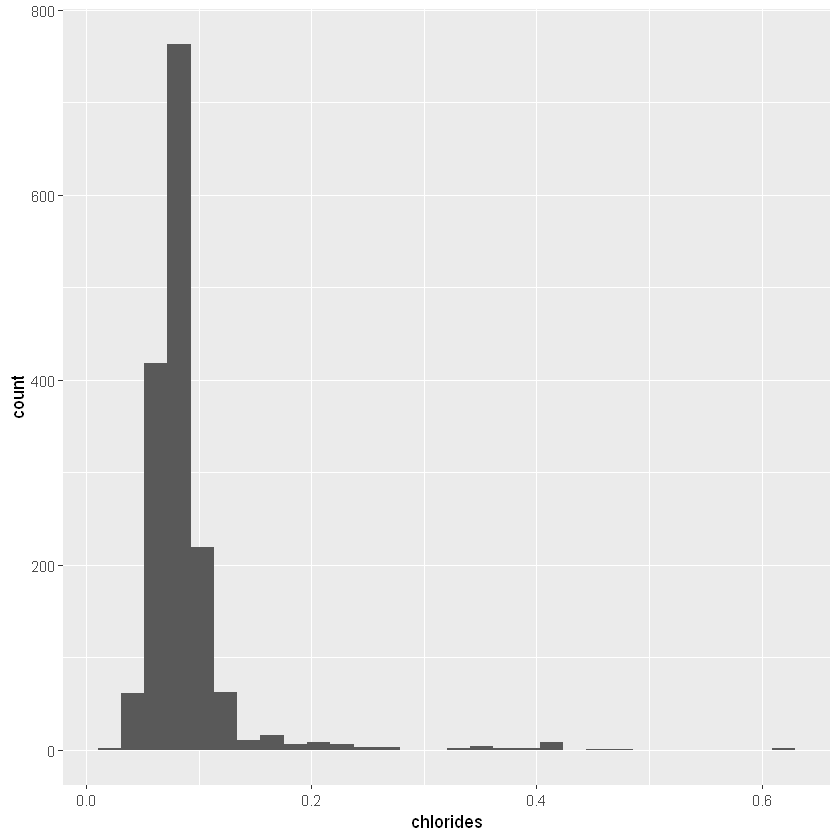

In [99]:
ggplot(aes(x=chlorides),data=pf) + geom_histogram()

In [100]:
# 查看chlorides统计量
summary(pf$chlorides)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.01200 0.07000 0.07900 0.08747 0.09000 0.61100 

chlorides最小值为0.012，最大值为0.611，右偏严重

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


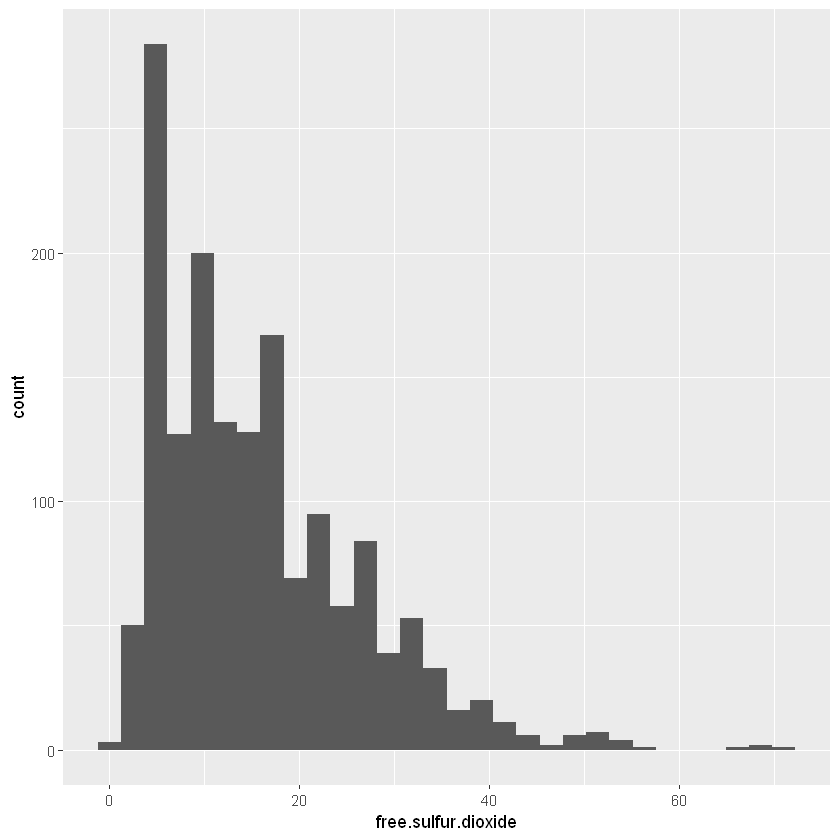

In [102]:
#查看free.sulfur.dioxide分布
ggplot(aes(x=free.sulfur.dioxide),data=pf)+
  geom_histogram()

In [103]:
summary(pf$free.sulfur.dioxide)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00    7.00   14.00   15.87   21.00   72.00 

free.sulfur.dioxide最小值为1，最大值为72，右偏严重

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


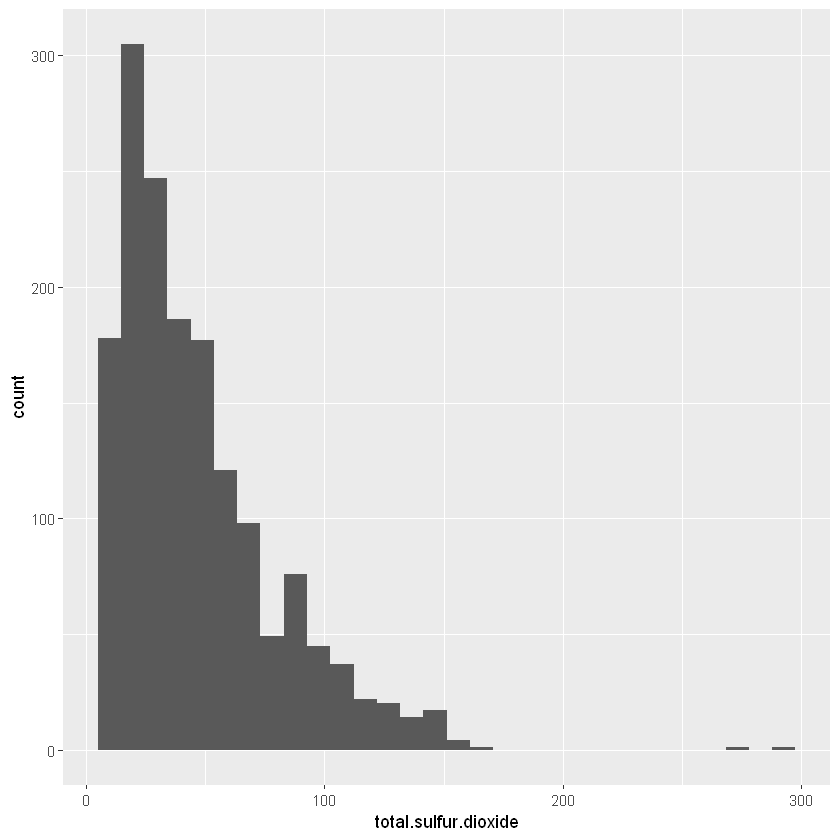

In [104]:
# 变量total.sulfur.dioxide分布
ggplot(aes(x=total.sulfur.dioxide),data=pf)+
  geom_histogram()

In [105]:
summary(pf$total.sulfur.dioxide)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   6.00   22.00   38.00   46.47   62.00  289.00 

total.sulfur.dioxide右偏严重

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


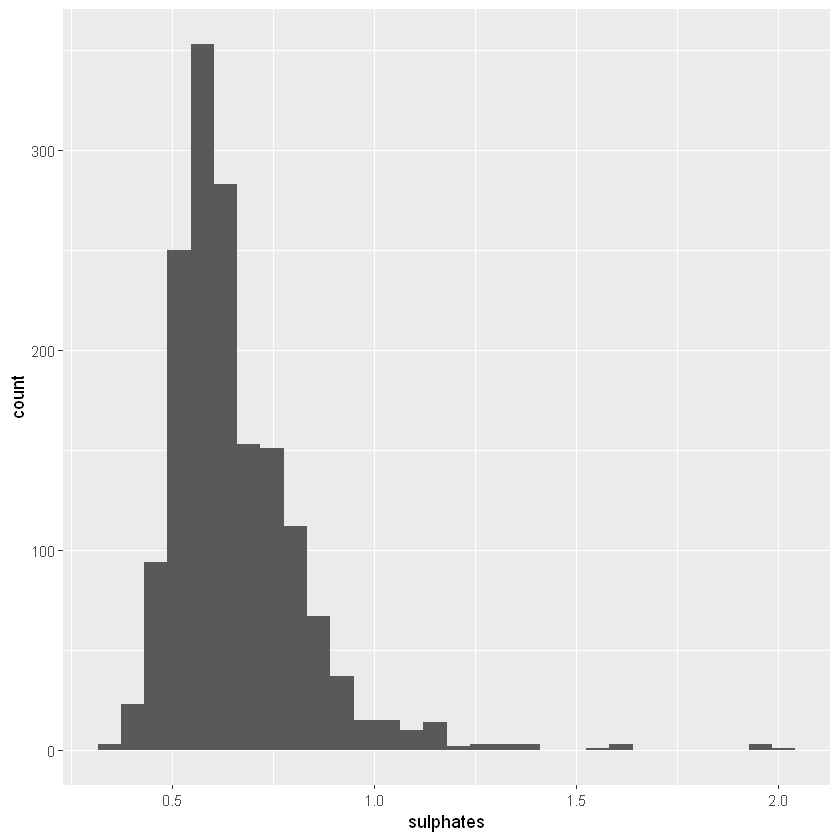

In [106]:
# 变量sulphates分布
ggplot(aes(x=sulphates),data=pf)+geom_histogram()

In [107]:
summary(pf$sulphates)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.3300  0.5500  0.6200  0.6581  0.7300  2.0000 

suplhates大部分集中在0.5到0.7之间，有些右偏

   ### 你的数据结构是什么?


我们有13个变量，1599个观测值。

其中X是标识符

quality是因变量，质量大部分处于5或6

剩下的12个变量
```
酸：fixe.acidity，volatile.acidity，citric.acid,
甜：residual.sugar，alcohol
咸：chlorides
苦：free.sulfur.dioxide，total.sulfur.dioxide，sulphates
```
以及PH，density

因变量quality分布偏正态，PH，density分布偏正态，其他10个变量右偏

### 你的数据集内感兴趣的主要特性有哪些？

哪些化学成分会影响红葡萄酒的质量？是否与pH,density与quanlity有些关系呢？需要进一步分析

### 你认为数据集内哪些特征可以帮助你探索兴趣特点？

PH,density与quality都是正态分布，是不是他们之间的相关性会更强一点呢？

### 根据数据集内已有变量，你是否创建了任何新变量？

创建了一个新的变量rating
小于5的为bad，5到6的为average，大于6的为good

### 在已经探究的特性中，是否存在任何异常分布？你是否对数据进行一些操作？

citric.acid有132的值为0，可能是缺失值。之前对subset(pf,!is.na(citric.acid))做了一些单变量分布，但是变化不大，这里就不先对缺失值进行处理



### 双变量图

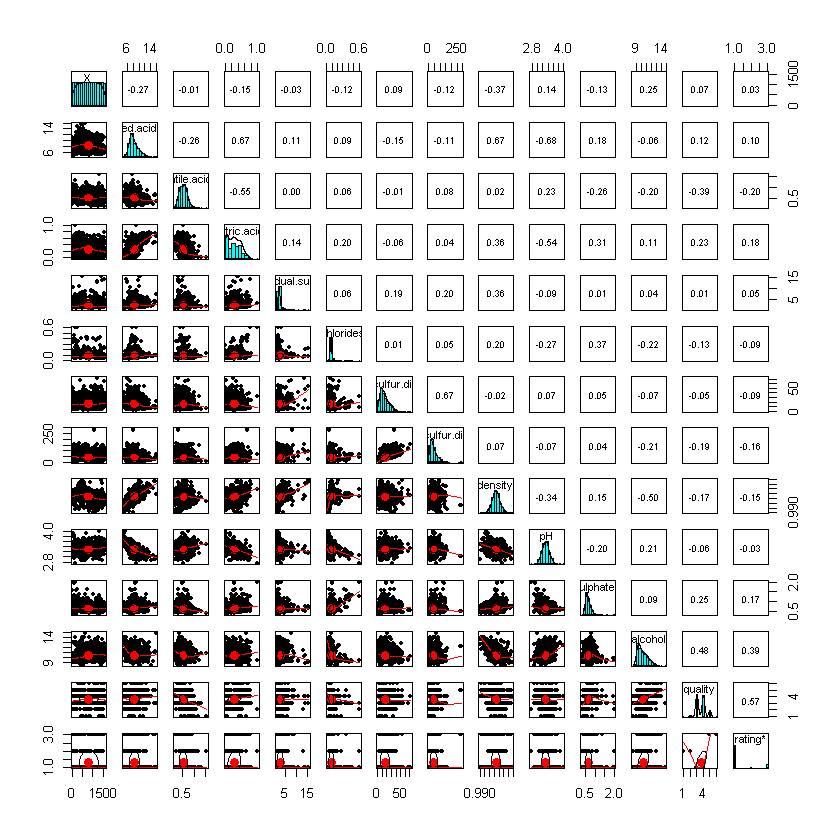

In [128]:
library(psych)
set.seed(20022012)
pairs.panels(pf)

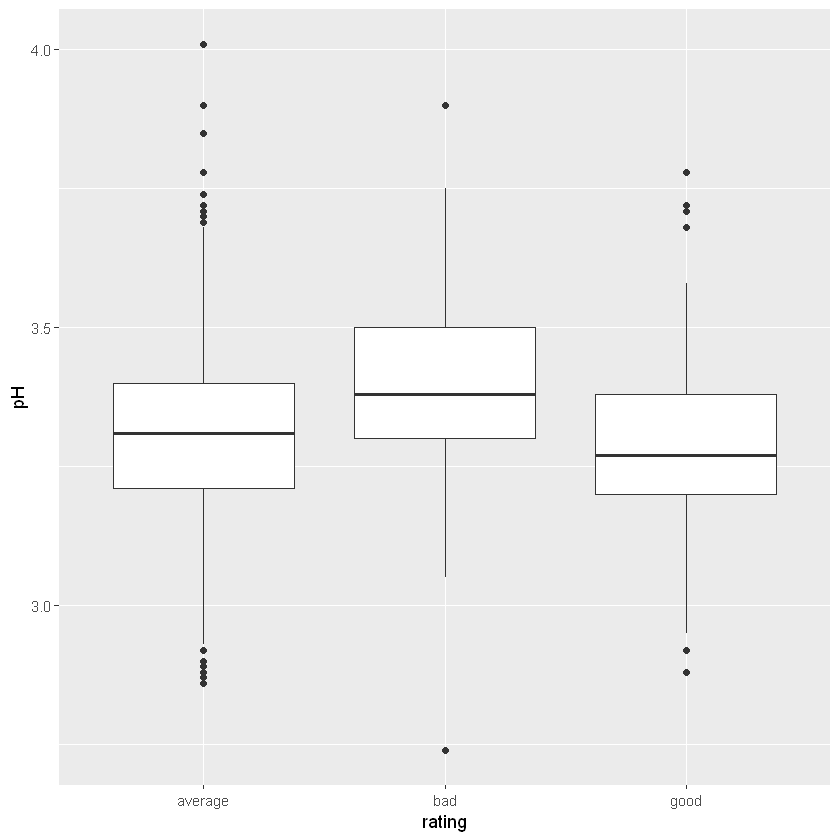

In [114]:
qplot(x=rating,y=pH,data=pf,geom='boxplot')

其中pH与rating呈负相关，bad的pH最高，其次是average，最后是good

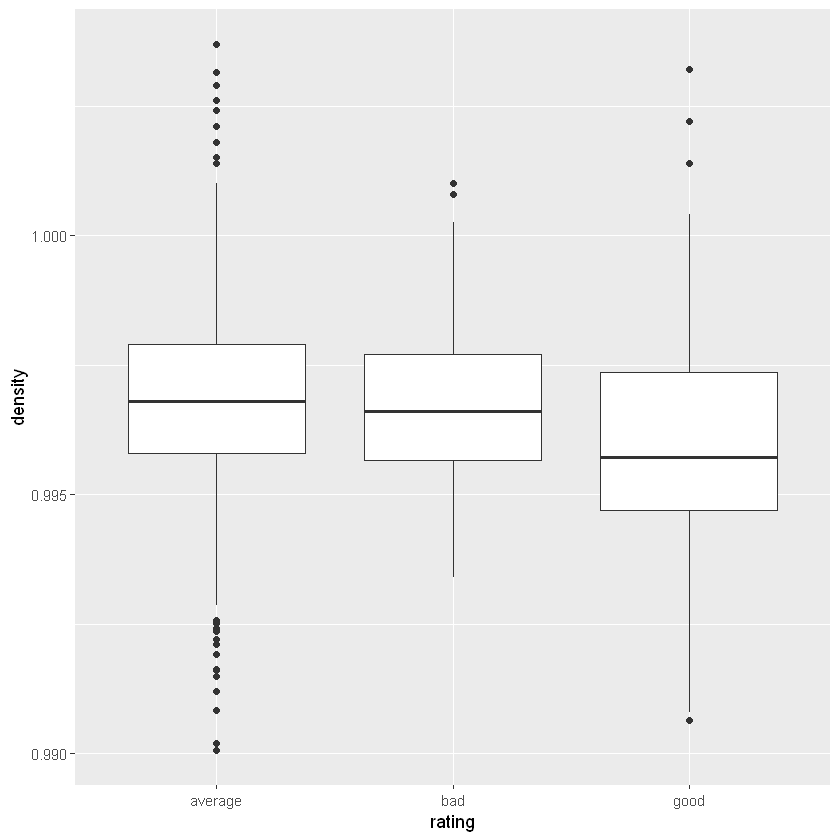

In [115]:
qplot(x=rating,y=density,data=pf,geom='boxplot')

density与rating的箱线图没有规律可言，之前density的分布是正态分布，本来和rating可能有关系，但是从箱线图看不出规律

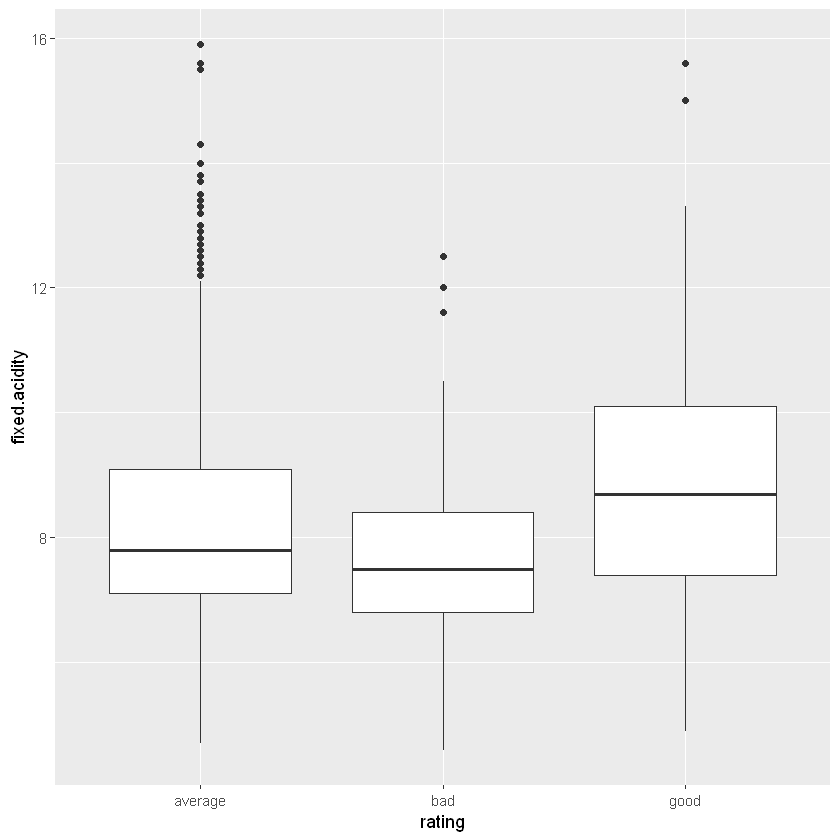

In [116]:
qplot(x=rating,y=fixed.acidity,data=pf,geom='boxplot')

fixed.acidity与rating呈正相关

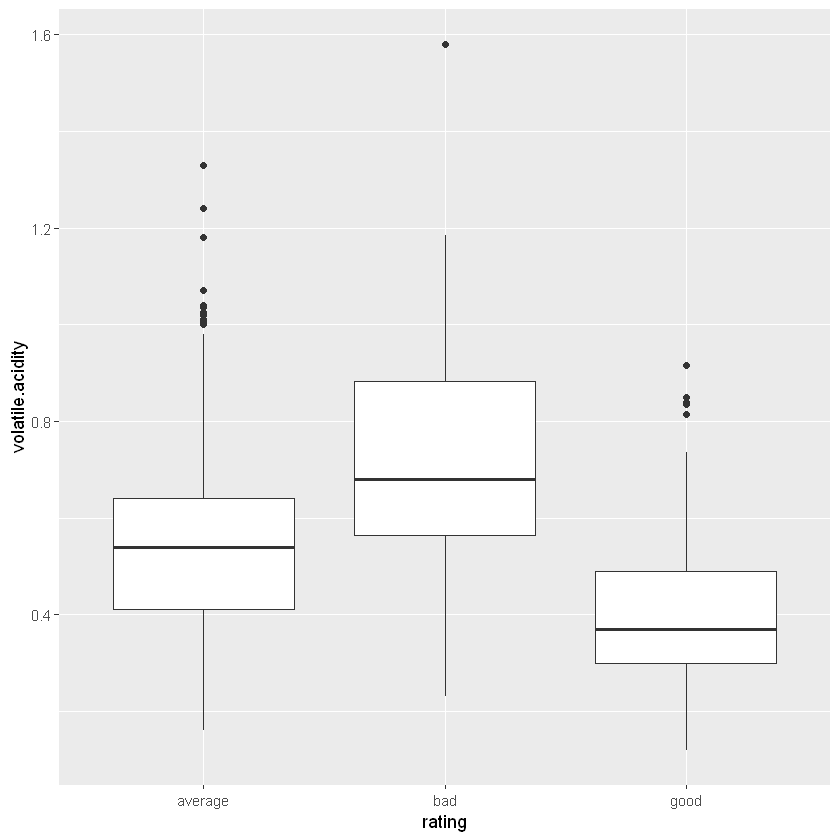

In [117]:
qplot(x=rating,y=volatile.acidity,data=pf,geom='boxplot')

volatile.acidity与rating呈现负相关

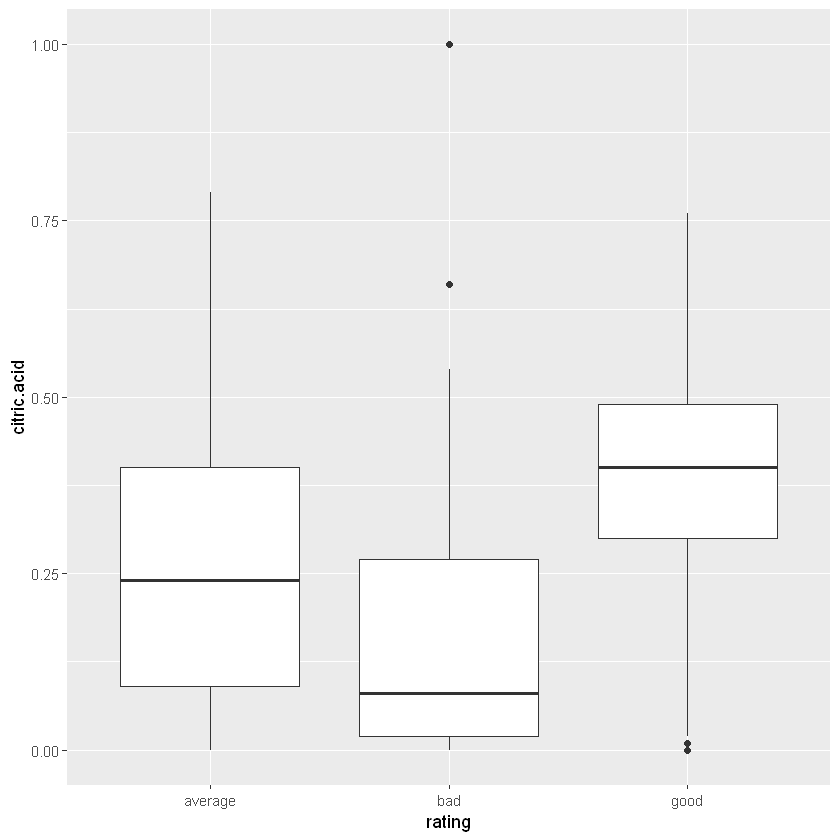

In [118]:
qplot(x=rating,y=citric.acid,data=pf,geom='boxplot')

citric.acid与rating呈正相关

Warning message:
"Removed 125 rows containing non-finite values (stat_boxplot)."

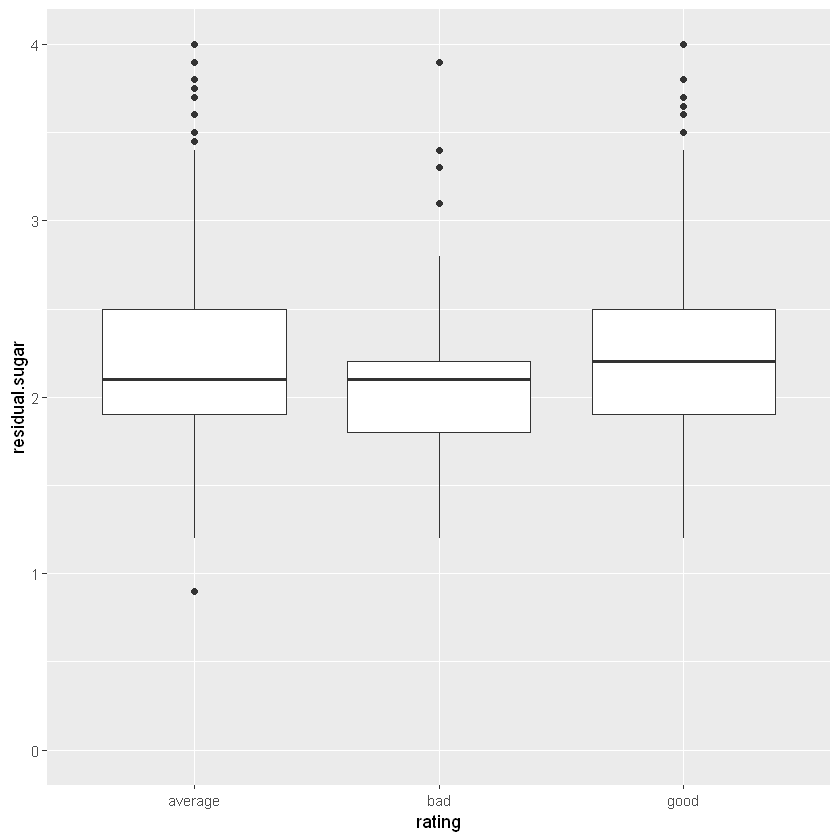

In [119]:
qplot(x=rating,y=residual.sugar,data=pf,geom='boxplot') + ylim(0,4)

residual.sugar与rating的关系不太大

Warning message:
"Removed 22 rows containing non-finite values (stat_boxplot)."

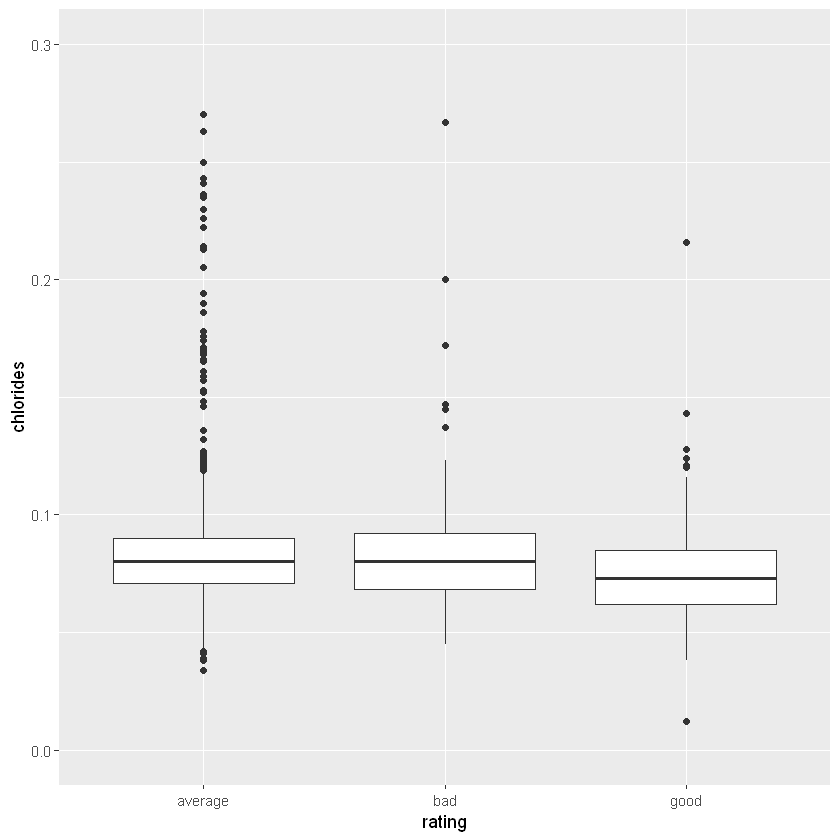

In [120]:
qplot(x=rating,y=chlorides,data=pf,geom='boxplot') + ylim(0,0.3)

chlorides与rating的关系不太大

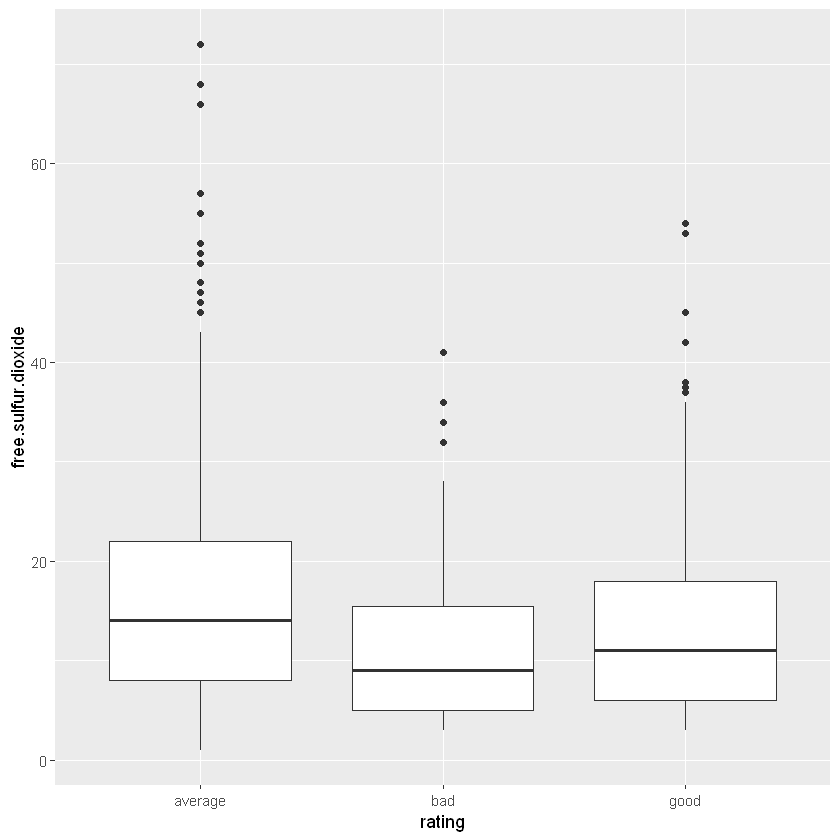

In [121]:
qplot(x=rating,y=free.sulfur.dioxide,
      data=pf,
      geom='boxplot')

free.sulfur.dioxide与rating之间变动没有规律

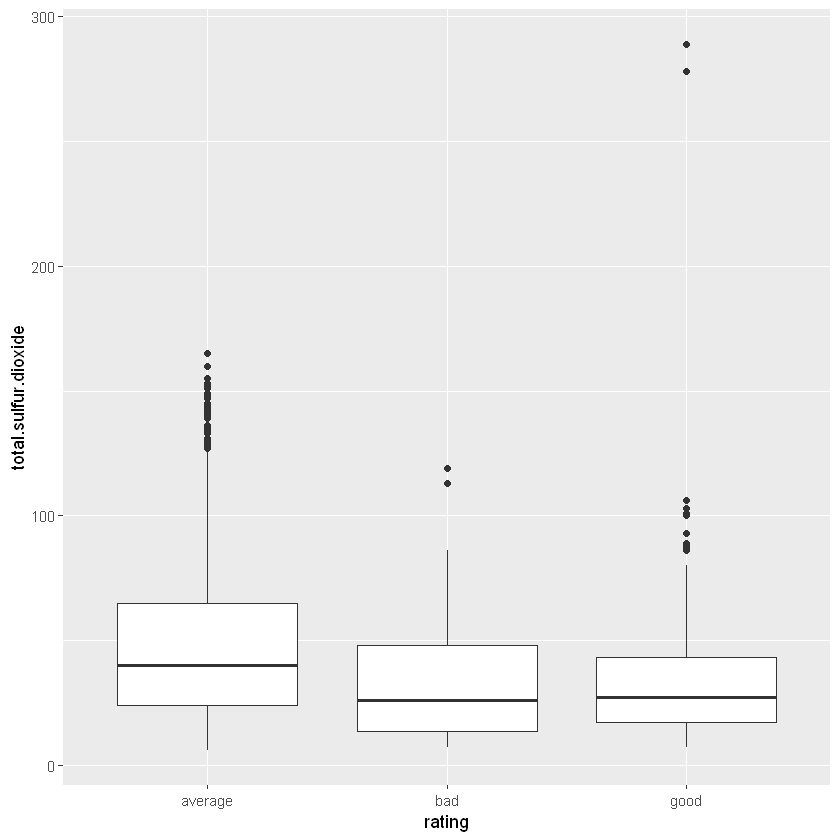

In [122]:
qplot(x=rating,y=total.sulfur.dioxide,data=pf,
     geom='boxplot')

total.sulfur.dioxide与rating之间的没有什么变化规律

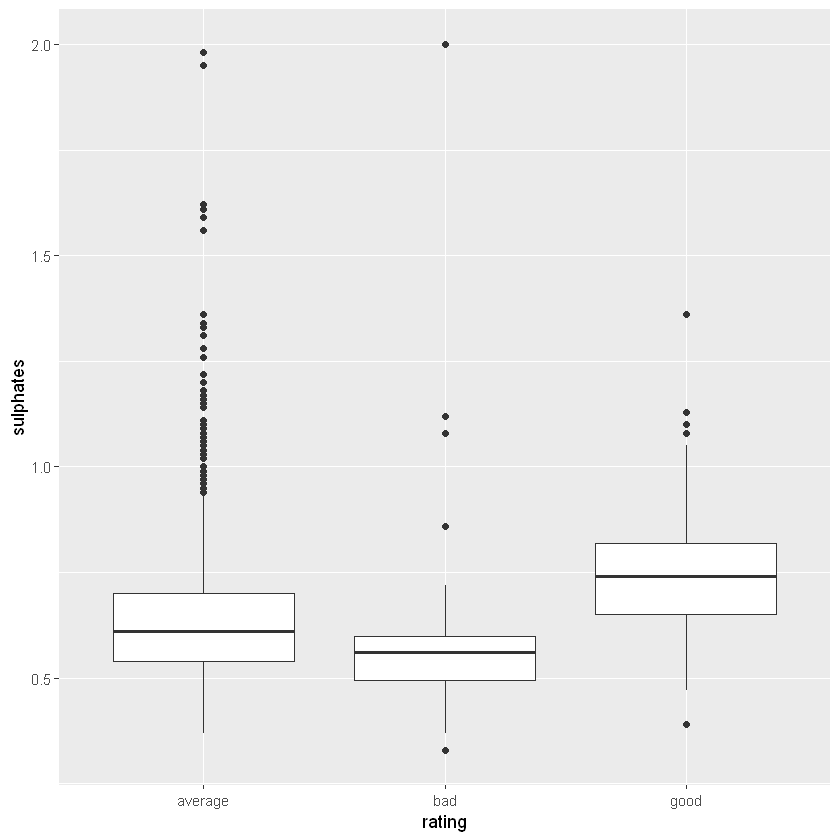

In [123]:
qplot(x=rating,y=sulphates,
      data=pf,
      geom='boxplot')

sulphates与rating正相关

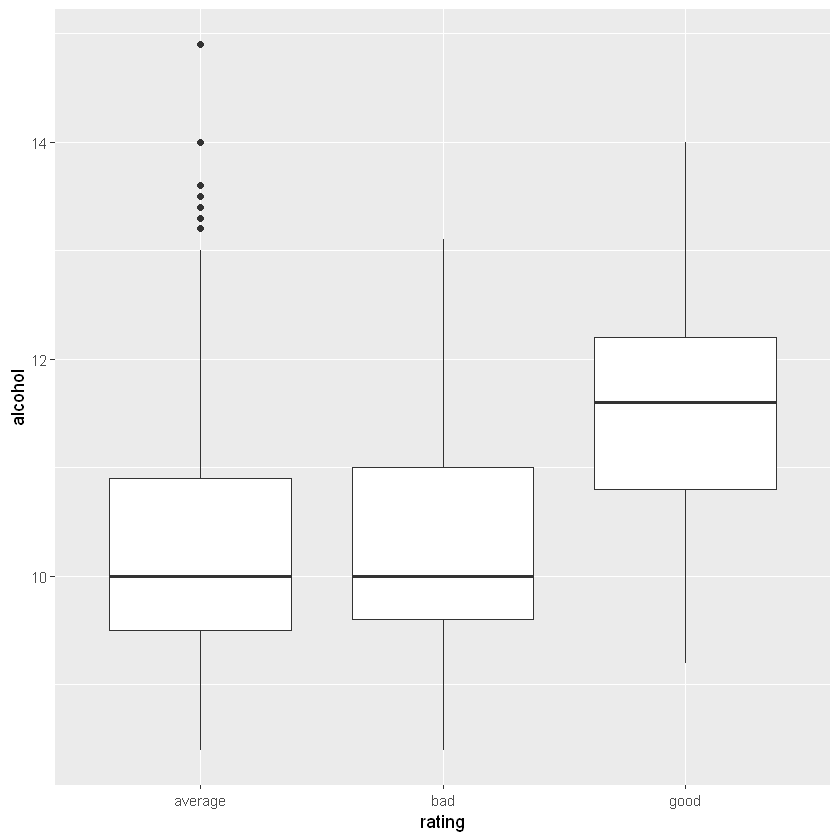

In [124]:
qplot(x=rating,y=alcohol,
      data=pf,
      geom='boxplot')

当rating为good,提高时,alcohol也大幅度提高，正相关。

In [136]:
#与酸有关的变量之间的相关系数
cor.test(pf$fixed.acidity,pf$volatile.acidity)
cor.test(pf$fixed.acidity,pf$citric.acid)
cor.test(pf$volatile.acidity,pf$citric.acid)


	Pearson's product-moment correlation

data:  pf$fixed.acidity and pf$volatile.acidity
t = -10.589, df = 1597, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.3013681 -0.2097433
sample estimates:
       cor 
-0.2561309 



	Pearson's product-moment correlation

data:  pf$fixed.acidity and pf$citric.acid
t = 36.234, df = 1597, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.6438839 0.6977493
sample estimates:
      cor 
0.6717034 



	Pearson's product-moment correlation

data:  pf$volatile.acidity and pf$citric.acid
t = -26.489, df = 1597, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.5856550 -0.5174902
sample estimates:
       cor 
-0.5524957 


In [126]:
#与甜有关的residual.sugar，alcohol相关系数
cor.test(pf$residual.sugar,pf$alcohol)


	Pearson's product-moment correlation

data:  pf$residual.sugar and pf$alcohol
t = 1.6829, df = 1597, p-value = 0.09258
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.006960058  0.090909069
sample estimates:
       cor 
0.04207544 


In [127]:
#与苦有关的三个变量free.sulfur.dioxide，total.sulfur.dioxide，sulphates相关系数
cor.test(pf$free.sulfur.dioxide,pf$total.sulfur.dioxide)
cor.test(pf$total.sulfur.dioxide,pf$sulphates)
cor.test(pf$total.sulfur.dioxide,pf$sulphates)


	Pearson's product-moment correlation

data:  pf$free.sulfur.dioxide and pf$total.sulfur.dioxide
t = 35.84, df = 1597, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.6395786 0.6939740
sample estimates:
      cor 
0.6676665 



	Pearson's product-moment correlation

data:  pf$total.sulfur.dioxide and pf$sulphates
t = 1.7178, df = 1597, p-value = 0.08602
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.006087119  0.091774762
sample estimates:
       cor 
0.04294684 



	Pearson's product-moment correlation

data:  pf$total.sulfur.dioxide and pf$sulphates
t = 1.7178, df = 1597, p-value = 0.08602
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.006087119  0.091774762
sample estimates:
       cor 
0.04294684 


# 双变量分析

### 探讨你在这部分探究中观察到的一些关系。这些感兴趣的特性与数据集内其他特性有什么区别？

正相关：fixed.acidity，citric.acid与rating，sulphates，alcohol与rating呈正相关。

负相关：
pH、volatile.acidity与rating呈负相关。

不相关：
density、residual.sugar，chlorides、free.sulfur.dioxide、total.sulfur.dioxide与rating之间的好像没有什么变化规律。


### 你是否观察到主要特性与其他特性之间的有趣关系？

酸这几个变量fixed.acidity，volatile.acidity，citric.acid，有的是正相关，有的是负相关。相关的方向还不一致。
甜这几个变量：residual.sugar，alcohol都是正相关。
苦这几个变量free.sulfur.dioxide，total.sulfur.dioxide，sulphates也都是正相关。

经过单变量和双变量的分析后，我决定看看多变量，看看是否有什么新发现。

### 你发现最强的关系是什么关系？
我自己的分析中，fixed.acidity 和 citric.acid的关系最强，相关系数是0.6717034。
猜测这两种酸度可能成分上有部分一致

### 多变量图

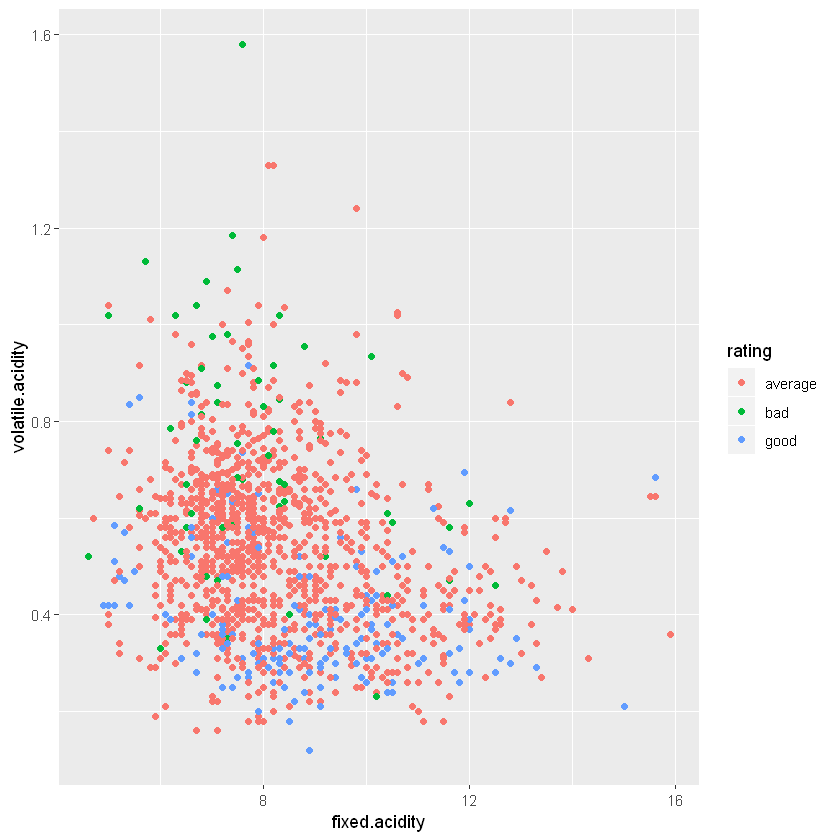

In [62]:
ggplot(aes(x= fixed.acidity, y= volatile.acidity), data = pf) + geom_point(aes(color = rating))

质量高的红酒主要集中在volatile.acidity较低的区域，fixed.acidity值比较分散

质量低的红酒主要分布在fixed.acidity低的区域，volatile.acidity比较分散的地带

一般的红酒其fixed.acidity与volatile.acidity的值没有明显特征

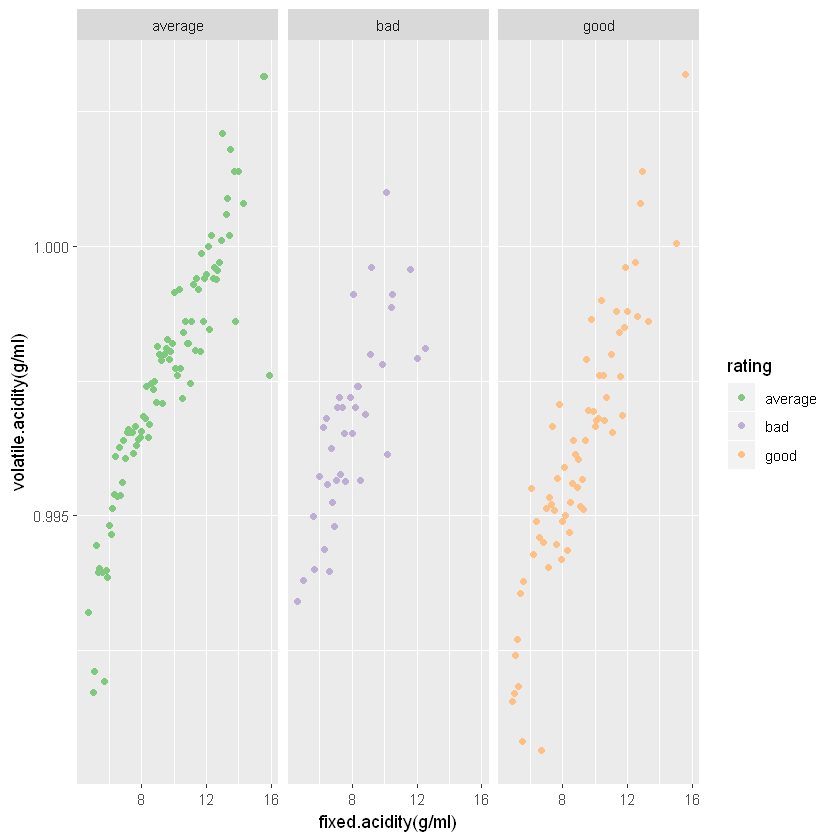

In [63]:
ggplot(aes(x=fixed.acidity , y=density),data=pf) + geom_point(aes(color=rating),
        stat='summary',fun.y=median) + scale_color_brewer(type = 'qual') + 
        xlab('fixed.acidity(g/ml)')+ylab('volatile.acidity(g/ml)')+facet_wrap(~rating)

不管是good,average还是bad红酒，都会随着fixed.acidity的升高，density的值也会越高

# 多变量分析



###  探讨你在这部分探究中观察到的一些关系。通过观察感兴趣的特性，是否存在相互促进的特性？
质量高的红酒主要集中在volatile.acidity较低的区域,fixed.acidity值比较分散。

质量低的红酒主要集中在fixed.acidity低的区域，volatile.acidity比较分散的地带。

一般的红酒volatile.acidity,fixed.acidity的值没有明显的特征。

不管是good,average还是bad红酒，都会随着fixed.acidity的升高，density的值也会越高。

### 功能之间有什么有趣或令人惊奇的交互？
volatile.acidity的高低对红酒质量的好坏有影响，volatile.acidity数值低，就质量就高。



# 定稿图与总结

### 绘图一

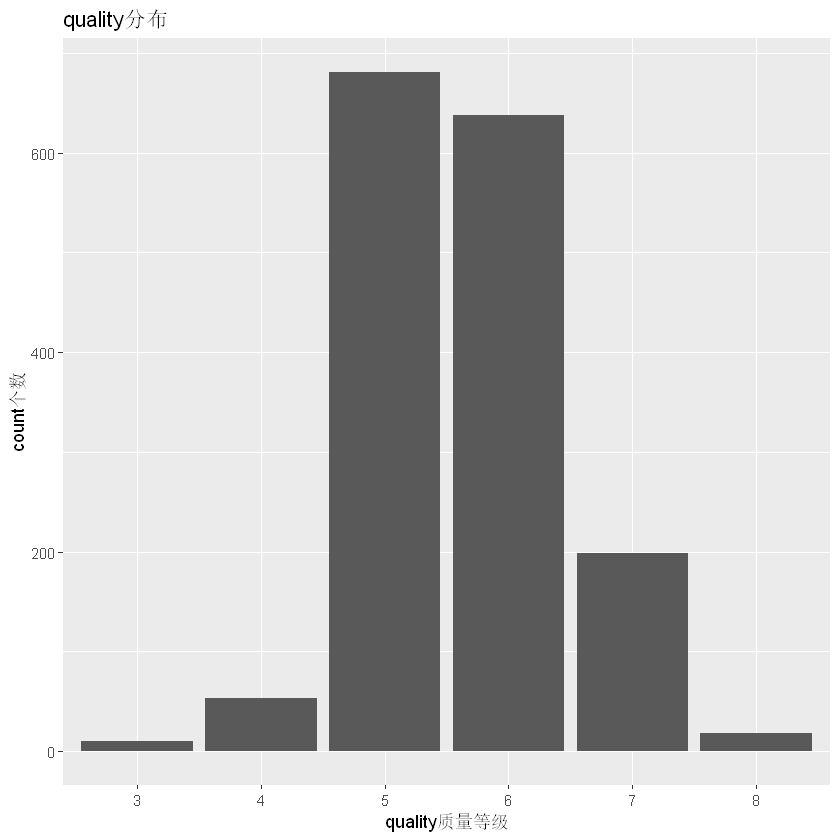

In [65]:
## 红酒质量柱状图
library(ggplot2)
ggplot(aes(x=quality),data=pf)+
            geom_bar()+ 
            ggtitle('quality分布')+
            xlab('quality质量等级')+
            ylab('count个数')

### 描述一
红酒质量大部分处于5或者6.其中质量5的红酒数量最多，有681种。其次是质量6的红酒有638种。质量在3和8的红酒数量比较少

### 绘图二

mapping: group = 1 
geom_smooth: na.rm = FALSE, se = TRUE
stat_smooth: na.rm = FALSE, se = TRUE, method = lm, formula = y ~ x
position_identity 

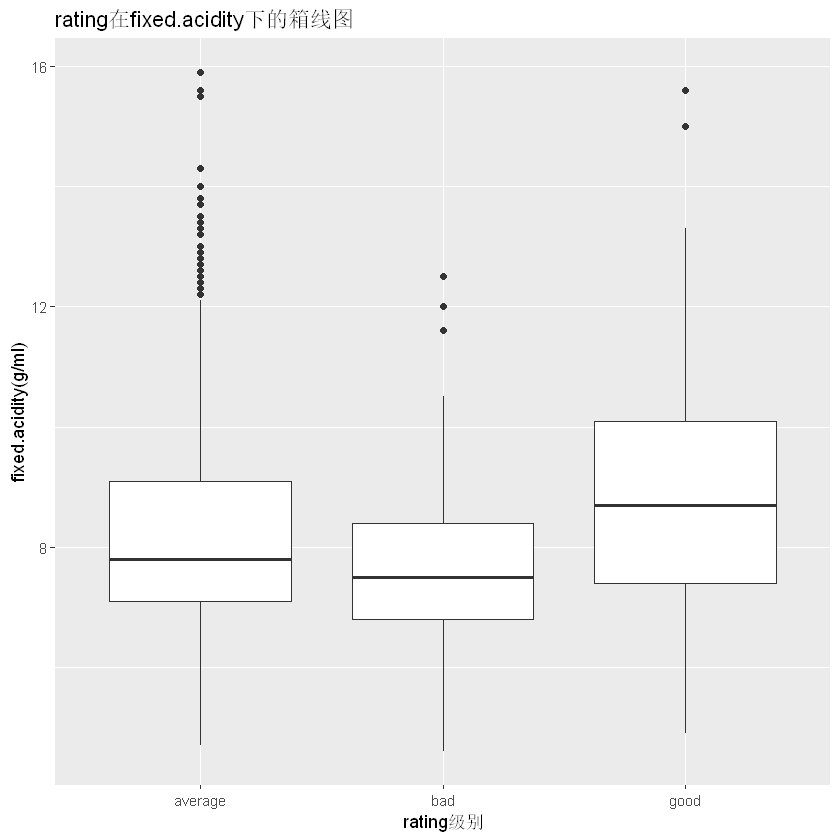

In [66]:
qplot(x=rating,y=fixed.acidity,data=pf,geom='boxplot') +
            ggtitle('rating在fixed.acidity下的箱线图')+
            xlab('rating级别')+
            ylab('fixed.acidity(g/ml)')
            geom_smooth(method='lm',aes(group=1))

### 描述二
fixed.acidity与rating呈正相关

### 绘图三

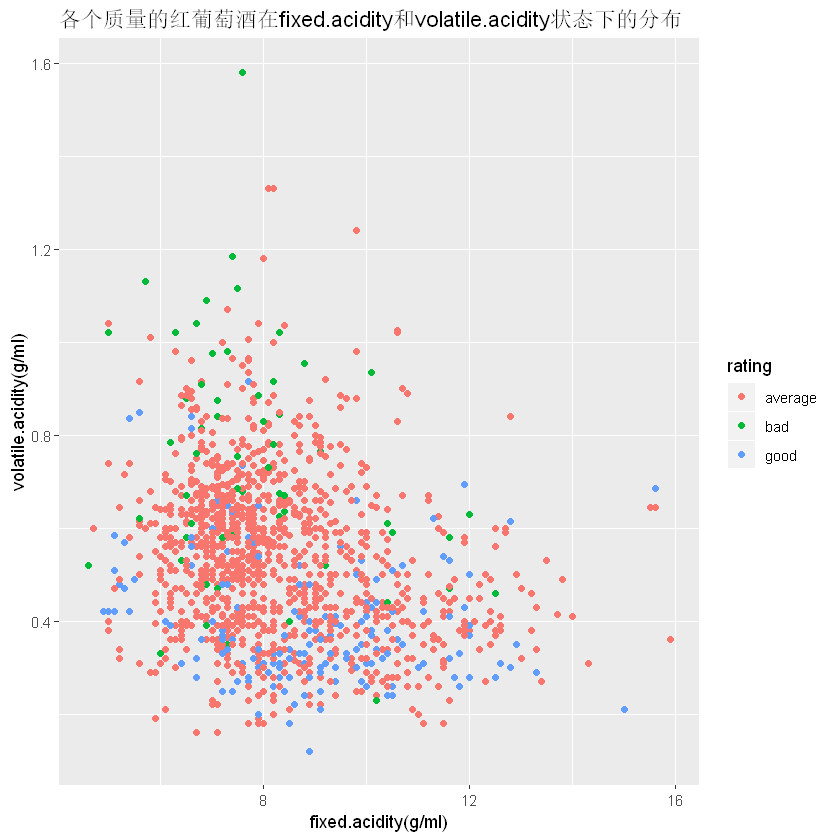

In [67]:
ggplot(aes(x = fixed.acidity , y = volatile.acidity) , data = pf)+ 
            geom_point(aes(color = rating))+
            xlab('fixed.acidity(g/ml)')+
            ylab('volatile.acidity(g/ml)')+
            ggtitle('各个质量的红葡萄酒在fixed.acidity和volatile.acidity状态下的分布')

### 描述三

质量高的红酒主要集中在volatile.acidity较低的区域,fixed.acidity值比较分散。

质量低的红酒主要集中在fixed.acidity低的区域，volatile.acidity比较分散的地带。

一般的红酒volatile.acidity,fixed.acidity的值没有明显的特征。

# 反思

本数据集包含1599个数据，13个变量。先是通过对单个变量进行探索性数据分析，做直方图，然后双变量分析，采用散点图，相关系数。之后，进行多变量分析。

正相关：fixed.acidity，citric.acid与rating，sulphates，alcohol与rating呈正相关。
负相关：pH、volatile.acidity与rating呈负相关。

在做单变量的时候，我根据变量的分布，以为因变量quality成正态分布，那自变量有正态分布的，两者就有关系。后来做双变量的时候才发现有些自变量虽然是正态分布，但是与quality不太相关。citric.acid有缺失值，但是我没有处理，可能会我们的分析造成不利的影响。

数据集中数据偏少，这些变量并不是很好的能预测quality，可能数据集没有包含某些重要的变量。更进一步可以考虑主成分分析等其他的分析方法深入研究数据集。
